# Classification

### KNN - K Nearest Neigbours

In [1]:
# We will use Iris data available in scikit learn for our model 

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Loading data

iris = load_iris()
X = iris.data
Y = iris.target


# Instantiating estimators, I.e. select the model you want to use... KNN 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)


new_data = [[3,5,4,2],[5,3,1,0]]
print(knn.predict(new_data))

[1 0]


### Logistic Regression

In [14]:
# Lets try Logestic on the same dataset

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,Y)
print(logreg.predict(new_data))

[2 0]


### Decision Trees

In [16]:
# Lets try decsion tree clasifier

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X,Y)
print(DT.predict(new_data))

[1 0]


In [17]:
# Lets try Extra trees

from sklearn.tree import ExtraTreeClassifier
ET = DecisionTreeClassifier()
ET.fit(X,Y)
print(ET.predict(new_data))

[1 0]


In [19]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Linear Regression 

In [24]:

import pandas as pd
import numpy as np

# Reading data from csv
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [25]:
#to look at the first five rows of the object data

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
#to look at the last five rows of the object data

data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [23]:
# to look at the number of columns and observations in the data

data.shape

(200, 5)

In [29]:
## Seaborn for visulization
import seaborn as sns

%matplotlib inline

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


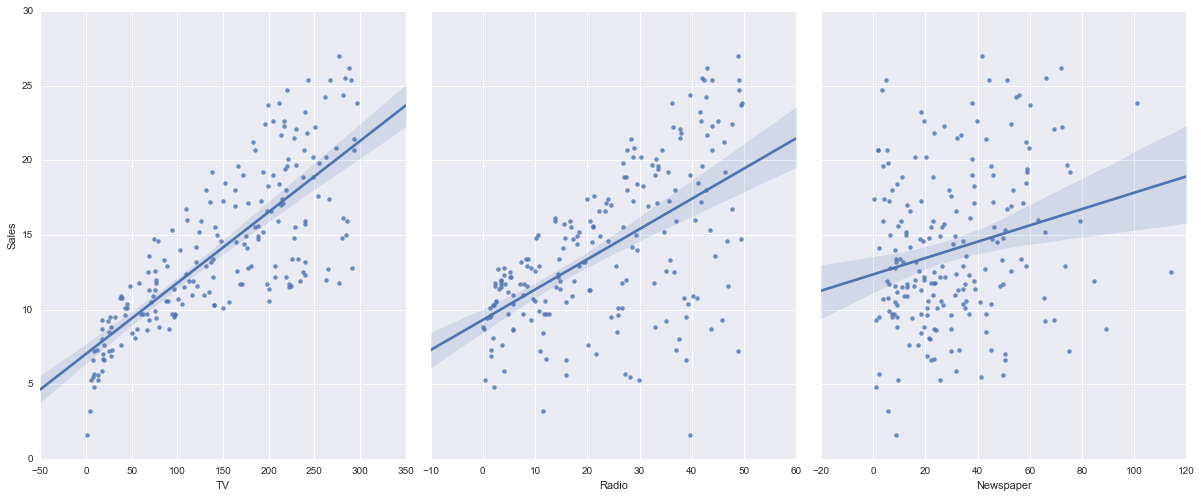

In [34]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size = 7, aspect=0.8,kind = 'reg')

#### Building the LR model on complete data and tetsing on the same data

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [59]:
cols = ['TV','Radio','Newspaper']

X = data[cols]
Y = data['Sales']

lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print('R square value for lr on complete on data is %f' %metrics.r2_score(lr.predict(X),Y))
print ('INtercept is %f'%lr.intercept_)
print (lr.coef_)
print(zip(cols,lr.coef_))

R square value for lr on complete on data is 0.885435
INtercept is 2.938889
[ 0.04576465  0.18853002 -0.00103749]


#### Lets now use train test splitting to test our accuracy

In [64]:
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [66]:
X = data[cols]
Y = data[['Sales']]

lr = LinearRegression()
lr.fit(x_train,y_train)

print('R square value for lr on complete on training is %f' %metrics.r2_score(lr.predict(x_train),y_train))
print('R square value for lr on complete on testing is %f' %metrics.r2_score(lr.predict(x_test),y_test))

R square value for lr on complete on training is 0.888603
R square value for lr on complete on testing is 0.878375


In [67]:
print ('INtercept is %f'%lr.intercept_)
print (lr.coef_)
print(zip(cols,lr.coef_))

INtercept is 2.978767
[[ 0.04668512  0.18501553 -0.00153043]]


#### EValuation metrcis for linear regression

In [76]:
print('R square value for lr on complete on testing is %f' %metrics.r2_score(lr.predict(x_test),y_test))
print('MAE value for lr on complete on testing is %f' %metrics.mean_absolute_error(lr.predict(x_test),y_test))
print('MSE value for lr on complete on testing is %f' %metrics.mean_squared_error(lr.predict(x_test),y_test))
print('RMSE value for lr on complete on testing is %f' %np.sqrt(metrics.mean_squared_error(lr.predict(x_test),y_test)))

R square value for lr on complete on testing is 0.878375
MAE value for lr on complete on testing is 1.216226
MSE value for lr on complete on testing is 2.504407
RMSE value for lr on complete on testing is 1.582532
